In [33]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
from fuzzywuzzy import fuzz, process
from autocorrect import Speller
from config import client_id, client_secret
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import matplotlib.pyplot as plt
import pickle
import re

spell = Speller()

- Install necessary libraries and create a Spotify developer account (if not done).
- Create a DataFrame with the top 100 songs and respective artists by scraping the website Billboard Hot 100.
- The DataFrame should have 2 columns: song_title, artist.

In [7]:
# scraping top 100 from billboard
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)
print(response)

soup = BeautifulSoup(response.content, "html.parser")

titles = []
for title in soup.find_all(class_ = 'o-chart-results-list-row-container'):
   titles.append(title.h3.get_text(strip = True))

artists = []
for artist in soup.find_all(class_ = 'o-chart-results-list-row-container'):
    artists.append(artist.h3.find_next('span').get_text(strip = True))

top_100 = pd.DataFrame({'song_title':titles, 'artist':artists})
top_100.to_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/top_100.csv")

<Response [200]>


- Using the Spotipy library, create a DataFrame storing the audio_features of at least 1000 songs.
- The more diverse your playlist, the better the end result will be!

In [5]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [6]:
playlist_1 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXcBWIGoYBM5M") # Today's Top Hits
playlist_2 = sp.user_playlist_tracks("spotify", "6vDGVr652ztNWKZuHvsFvx") # Deep House 2023
playlist_3 = sp.user_playlist_tracks("spotify", "72GgLgQ63eUHG3CyCv42Ju") # Pop Punk Powerhouses
playlist_4 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX8FwnYE6PRvL") # Rock Party
playlist_5 = sp.user_playlist_tracks("spotify", "37i9dQZEVXbMDoHDwVN2tF") # Top 50 Global
playlist_6 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWYN9NBqvY7Tx") # Ultra Gaming
playlist_7 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXe6bgV3TmZOL") # Adrenaline Workout
playlist_8 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWWQRwui0ExPn") # Lofi Beats
playlist_9 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWYnwbYQ5HnZU") # Country Gold
playlist_10 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXcF6B6QPhFDv") # Rock This
playlist_11 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWWOaP4H0w5b0") # Metal Essentials
playlist_12 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX0XUsuxWHRQd") # RapCaviar
playlist_13 = sp.user_playlist_tracks("spotify", "37i9dQZF1EIgM5iO4YYPuD") # Dance Party Mix
playlist_14 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX7FY5ma9162x") # R&B Favourites
playlist_15 = sp.user_playlist_tracks("spotify", "37i9dQZF1EIfIliH9h0OqJ") # Afrobeats Mix
playlist_16 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX9loJQLuEvap") # Great Female Voices
playlist_17 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWVTKDs2aOkxu") # The Indie List
playlist_18 = sp.user_playlist_tracks("spotify", "37i9dQZEVXbNG2KDcFcKOF") #Top Songs - Global
playlist_19 = sp.user_playlist_tracks("spotify", "2txcPaMg1XCYj5FGceAk07") # Techno Remixes 2024 (Top 100)
playlist_10 = sp.user_playlist_tracks("spotify", "5ABHKGoOzxkaa28ttQV9sE") # Top 100 most streamed songs on Spotify
playlist_21 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX0SM0LYsmbMT") # Jazz Vibes
playlist_22 = sp.user_playlist_tracks("spotify", "1DSEi0lvLOzTiKqnaYZBDh") # Classical Music bangers 
playlist_23 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTAam0w6i0dI") # kpop
playlist_24 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX10zKzsJ2jva") # latin
playlist_25 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX504r1DvyvxG") # classic acoustic
playlist_26 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWVinJBuv0P4z") # feel good classics
playlist_27 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX7KNKjOK0o75") # have a great day
playlist_28 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXdmXczhgY3oW") # oldies
playlist_29 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWXeOurMWUII5") # Today's Top Hits
playlist_30 = sp.user_playlist_tracks("spotify", "2otQLmbi8QWHjDfq3eL0DC") # House
playlist_31 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXd6tJtr4qeot") # Punk
playlist_32 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQpj7X7UK8OOF") # Rock
playlist_33 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWZBCPUIUs2iR") # County
playlist_34 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQpgT26jgbgRI") # Metal
playlist_35 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQoqCH7BwIYb7") # R&B
playlist_36 = sp.user_playlist_tracks("spotify", "37i9dQZF1EIfIliH9h0OqJ") # Afrobeats
playlist_37 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQqkOPvHGajmW") # Indie
playlist_38 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQnqst5TRi17F") # Hip Hop
playlist_39 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXbITWG1ZJKYt") # Jazz
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQncLwOalG3K7") # 
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1EIhKhPuz9X9RP") # jazz
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWYzTSrc7SiSZ") # latin
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1EIcMbGxNGUuZo") # r&b
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1EIehE24MT7gFU") # pop
playlist_40 = sp.user_playlist_tracks("spotify", "76iQv4c5qSM4AgvXph4rJu") # punk
playlist_40 = sp.user_playlist_tracks("spotify", "61jNo7WKLOIQkahju8i0hw") # rock
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTkxQvqMy4WW") # country
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX4HvY8T59VN2") # indie
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXbO6rt3GhXDY") # indie pop
playlist_40 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWVdgXTbYm2r0") # hip hop

In [7]:
playlist_ids = playlist_ids = ["37i9dQZF1DXcBWIGoYBM5M", "6vDGVr652ztNWKZuHvsFvx", "72GgLgQ63eUHG3CyCv42Ju",
                               "37i9dQZF1DX8FwnYE6PRvL", "37i9dQZEVXbMDoHDwVN2tF", "37i9dQZF1DWYN9NBqvY7Tx",
                               "37i9dQZF1DXe6bgV3TmZOL", "37i9dQZF1DWWQRwui0ExPn", "37i9dQZF1DWYnwbYQ5HnZU",
                               "37i9dQZF1DXcF6B6QPhFDv", "37i9dQZF1DWWOaP4H0w5b0", "37i9dQZF1DX0XUsuxWHRQd",
                               "37i9dQZF1EIgM5iO4YYPuD", "37i9dQZF1DX7FY5ma9162x", "37i9dQZF1EIfIliH9h0OqJ",
                               "37i9dQZF1DX9loJQLuEvap", "37i9dQZF1DWVTKDs2aOkxu", "37i9dQZEVXbNG2KDcFcKOF",
                               "2txcPaMg1XCYj5FGceAk07", "5ABHKGoOzxkaa28ttQV9sE", "37i9dQZF1DX0SM0LYsmbMT",
                               "1DSEi0lvLOzTiKqnaYZBDh", "37i9dQZF1DWTAam0w6i0dI", "37i9dQZF1DX10zKzsJ2jva",
                               "37i9dQZF1DX504r1DvyvxG", "37i9dQZF1DWVinJBuv0P4z", "37i9dQZF1DX7KNKjOK0o75",
                               "37i9dQZF1DXdmXczhgY3oW", "37i9dQZF1DWXeOurMWUII5", "2otQLmbi8QWHjDfq3eL0DC",
                               "37i9dQZF1DXd6tJtr4qeot", "37i9dQZF1EQpj7X7UK8OOF", "37i9dQZF1DWZBCPUIUs2iR",
                               "37i9dQZF1EQpgT26jgbgRI", "37i9dQZF1EQoqCH7BwIYb7", "37i9dQZF1EIfIliH9h0OqJ",
                               "37i9dQZF1EQqkOPvHGajmW", "37i9dQZF1EQnqst5TRi17F", "37i9dQZF1DXbITWG1ZJKYt",
                               "37i9dQZF1EQncLwOalG3K7", "37i9dQZF1EIhKhPuz9X9RP", "37i9dQZF1DWYzTSrc7SiSZ",
                               "37i9dQZF1EIcMbGxNGUuZo", "37i9dQZF1EIehE24MT7gFU", "76iQv4c5qSM4AgvXph4rJu",
                               "61jNo7WKLOIQkahju8i0hw", "37i9dQZF1DWTkxQvqMy4WW", "37i9dQZF1DX4HvY8T59VN2",
                               "37i9dQZF1DXbO6rt3GhXDY", "37i9dQZF1DWVdgXTbYm2r0"]

def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

tracks = []
track_ids = []

In [8]:
for playlist_id in playlist_ids:
    playlist_tracks = get_playlist_tracks("Spotify", playlist_id)
    tracks.extend(playlist_tracks)

for track in tracks:
    track_ids.append(track['track']['id'])

print(len(tracks))
print(len(track_ids))

4939
4939


In [9]:
chunk_size = 100
chunks = [track_ids[i:i + chunk_size] for i in range(0, len(track_ids), chunk_size)]
all_features = []

for chunk in chunks:
    af = sp.audio_features(chunk)
    all_features.extend(af)

In [10]:
all_features = [i for i in all_features if i is not None]

In [11]:
song_db = pd.DataFrame(all_features)
song_db = song_db.drop_duplicates('id')
print(song_db.shape)
song_db.to_csv('song_database.csv')

(4349, 18)


- Create a Python program that takes a user input, checks if it is present in your scraped DataFrame.
- If it is, it recommends a random song from the DataFrame.
- If it’s not, it prints: Sorry, your song is not popular.
- Important note: For now, you will not use the DataFrame of audio features you created yesterday.

In [146]:
# getting user input and formatting it
song = input('Please enter the title of a song you like:')
song = song.title().strip()
songs = top_100['song_title'].values.tolist()

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media")

# play song that was entered
result = sp.search(q=f"{song}", limit=1)
song_id = result["tracks"]["items"][0]["id"]
display(play_song(song_id))

# train models on audiofeatures of  spotify databse, select and save best model

# unser input song
# check if song in billboard hot 100
# -> if not a perfect match with any of the songs, check fuzzy similarity with all 100 songs and see which one fits best - double check with user if this song was meant
# if yes, recommend another hot song and show player
# if not, get audiofeatures of this song from spotify
# use model to check which cluster the song belongs to
# sample song from the same cluster and show player

if song not in songs:
    rec_song_id = None
    best_match = None
    max_sim = 0
    for i in songs:
        similarity = fuzz.ratio(i, song)
        if similarity > max_sim:
            max_sim = similarity
            best_match = i
    if max_sim <= 90:
        follow_up = input(f"Did you mean '{best_match}'? (type yes or no): ").lower().strip()
        if follow_up == 'yes':
            song = best_match
            rec_song = random.choice(songs)
            rec_artist = top_100.query("song_title == @rec_song")['artist'].iloc[0]
            result = sp.search(q=f"{rec_song} {rec_artist}", limit=1)
            if result["tracks"]["items"]:
                rec_song_id = result["tracks"]["items"][0]["id"]
                print(f"Recommended song: {rec_song} by {rec_artist}")
                display(play_song(rec_song_id))
        else:
            print("Sorry, we couldn't find your song")
    else:
        print("Sorry, we couldn't find your song on Spotify.")

Please enter the title of a song you like: a bar song
Did you mean 'A Bar Song (Tipsy)'? (type yes or no):  yes


Recommended song: Liar by Jelly Roll


Using one of the Unsupervised Learning Algorithms that we have covered, create a model using the audio features DataFrame you created on Tuesday.

In [194]:
df = pd.read_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/song_database.csv")
df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.670,0.910,0,-4.070,0,0.0634,0.0939,0.0000,0.304,0.786,112.966,audio_features,1d7Ptw3qYcfpdLNL5REhtJ,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,https://api.spotify.com/v1/audio-analysis/1d7P...,157280,4
1,1,0.521,0.592,6,-7.777,0,0.0304,0.3080,0.0000,0.122,0.535,157.969,audio_features,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,https://api.spotify.com/v1/audio-analysis/2plb...,251668,3
2,2,0.554,0.808,1,-4.169,1,0.0368,0.2140,0.0000,0.159,0.372,108.548,audio_features,7ne4VBA60CxGM75vw0EYad,spotify:track:7ne4VBA60CxGM75vw0EYad,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,https://api.spotify.com/v1/audio-analysis/7ne4...,166300,4
3,3,0.777,0.783,0,-4.477,0,0.2600,0.0283,0.0000,0.355,0.939,149.027,audio_features,5vNRhkKd0yEAg8suGBpjeY,spotify:track:5vNRhkKd0yEAg8suGBpjeY,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,https://api.spotify.com/v1/audio-analysis/5vNR...,169917,4
4,4,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.0608,0.117,0.438,104.978,audio_features,6dOtVTDdiauQNBQEDOtlAB,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4


In [196]:
# drop columns i dont consider features:
print(df.shape)
df = df.drop(columns = ["liveness", "loudness", "speechiness", "tempo", "danceability", "uri", "track_href", "analysis_url",
                        "duration_ms", "time_signature", "Unnamed: 0", "type"])
df = df.dropna()
df['id'] = df['id'].astype(str)
df.set_index("id", inplace = True)

(4349, 19)


In [198]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns = df.columns, index=df.index)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# K means clustering

In [218]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(scaled_df)
labels = kmeans.labels_
np.unique(labels)
clusters = kmeans.predict(scaled_df)
pd.Series(clusters).value_counts().sort_index()
scaled_df["cluster"] = clusters
scaled_df.to_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/song_database_scaled_clustered.csv")

In [220]:
# save model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [222]:
# load model
with open("kmeans_model.pkl", "rb") as f:
    kmeans_loaded = pickle.load(f)

In [224]:
pd.Series(clusters).value_counts().sort_index()

0     290
1     215
2     353
3     261
4     252
5     360
6     250
7     318
8     268
9     404
10    361
11    230
12    214
13    400
14    173
Name: count, dtype: int64

In [226]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=scaled_df.drop("cluster", axis=1).columns)
centroids_df.index = [f"Cluster {i}" for i in range(len(centroids))]
cluster_variability = centroids_df.std(axis=0).sort_values(ascending=False)
print(cluster_variability)

mode                0.507093
instrumentalness    0.378519
acousticness        0.305687
key                 0.267176
energy              0.211501
valence             0.171196
dtype: float64


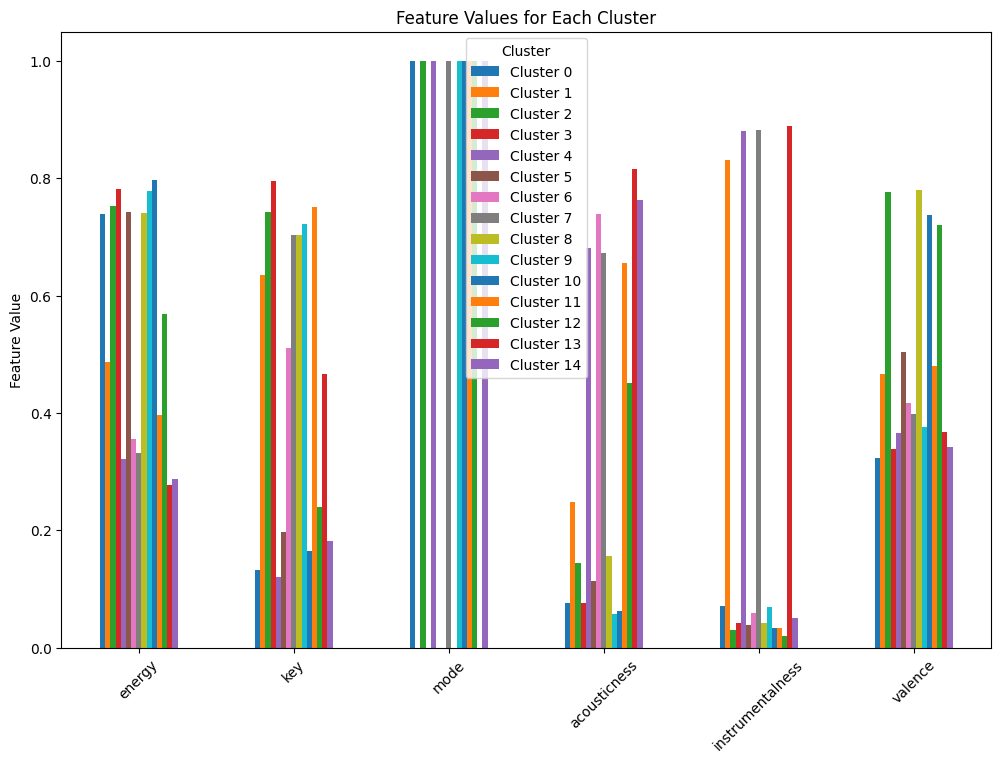

In [228]:
centroids_df.T.plot(kind="bar", figsize=(12, 8))
plt.title("Feature Values for Each Cluster")
plt.ylabel("Feature Value")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

## kmeans clustering eval

In [230]:
# silhouette
silhouette_avg = silhouette_score(scaled_df.drop("cluster", axis=1), clusters)
print(f"Silhouette Score: {silhouette_avg}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score: 0.2585514366894869


In [232]:
results = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df.drop("cluster", axis=1))
    clusters = kmeans.labels_
    
    silhouette_avg = silhouette_score(scaled_df.drop("cluster", axis=1), clusters)
    calinski_harabasz = calinski_harabasz_score(scaled_df.drop("cluster", axis=1), clusters)
    davies_bouldin = davies_bouldin_score(scaled_df.drop("cluster", axis=1), clusters)
    
    results.append({
        "k": k,
        "Silhouette": silhouette_avg,
        "Calinski-Harabasz": calinski_harabasz,
        "Davies-Bouldin": davies_bouldin})

results_df = pd.DataFrame(results)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


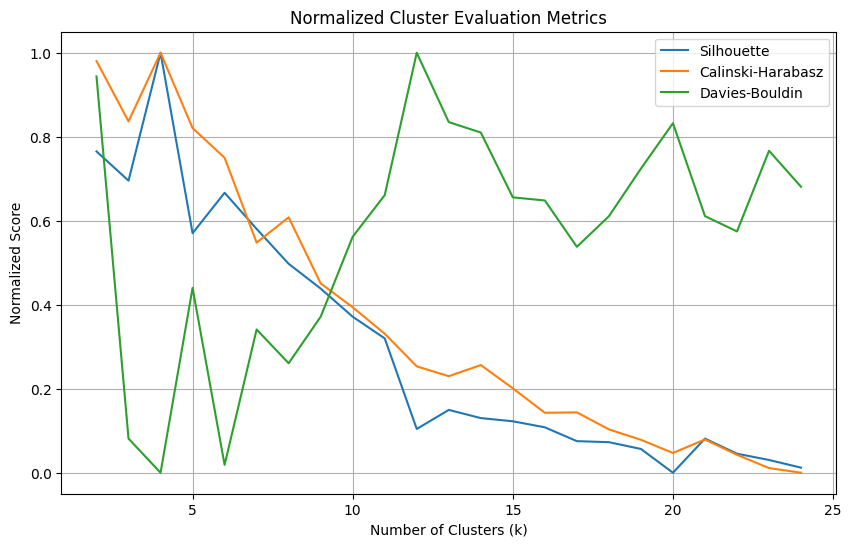

In [234]:
scaler = MinMaxScaler()
scaled_results = scaler.fit_transform(results_df.iloc[:, 1:])
results_df_normalized = pd.DataFrame(scaled_results, columns=results_df.columns[1:])
results_df_normalized['k'] = results_df['k']

plt.figure(figsize=(10, 6))
for col in results_df_normalized.columns[:-1]:
    plt.plot(results_df_normalized['k'], results_df_normalized[col], label=col)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Normalized Score')
plt.title('Normalized Cluster Evaluation Metrics')
plt.legend()
plt.grid()
plt.show()

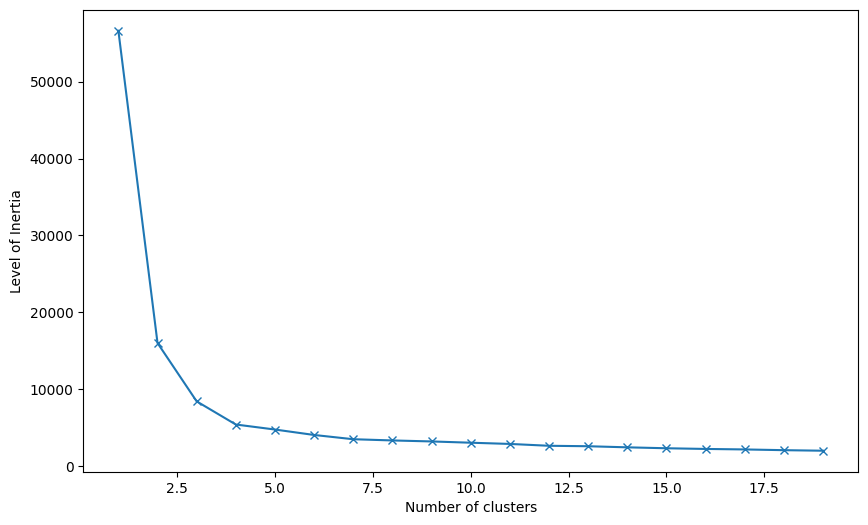

In [238]:
# inertia
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[["energy",
                   "key",
                   "mode",
                   "acousticness",
                   "instrumentalness",
                   "valence"]])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), inertia, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Level of Inertia')
plt.show()

# DBSCAN

In [120]:
for eps in [0.1, 0.2, 0.5, 1]:
    for min_samples in [3, 5, 10]:
        dbs = DBSCAN(eps=eps, min_samples=min_samples)
        pred = dbs.fit_predict(scaled_df)
        print(f"eps={eps}, min_samples={min_samples}, clusters={np.unique(pred)}")

eps=0.1, min_samples=3, clusters=[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156]
eps=0.1, min_samples=5, clusters=[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
eps=0.1, min_samples=10, clusters=[-1  0  1  2  3  4  5  6]
eps=0.2, min_samples=3, clusters=[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 

In [136]:
dbs = DBSCAN(eps=0.5, min_samples=3)
pred = dbs.fit_predict(scaled_df)
scaled_df_np = scaled_df.to_numpy()
scaled_df['cluster'] = pred

In [138]:
# Exclude noise points (-1) for silhouette calculation
valid_points = scaled_df[pred != -1]
valid_labels = pred[pred != -1]

if len(np.unique(valid_labels)) > 1:  # Silhouette is undefined for a single cluster
    silhouette_avg = silhouette_score(valid_points, valid_labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be computed for a single cluster.")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Silhouette Score: 0.6103910482868652


In [140]:
from collections import Counter
cluster_sizes = Counter(pred)
print(f"Cluster sizes: {dict(cluster_sizes)}")

Cluster sizes: {0: 319, 1: 224, 2: 672, 3: 783, 4: 216, 5: 324, 6: 380, 7: 9, 8: 7, 9: 386, 10: 14, 11: 7, 12: 6, 13: 7, 14: 12, 15: 45, 16: 5, 17: 14, 18: 12, 19: 15, 20: 163, 21: 354, 22: 186, 23: 15, 24: 11, 25: 5, 26: 9, 27: 5, 28: 4, 29: 8, 30: 6, 31: 6, 32: 5, 33: 9, 34: 5, 35: 6, 36: 5, 37: 17, 38: 5, 39: 5, 40: 21, 41: 9, 42: 8, 43: 15, 44: 4, 45: 6}


- Finalize the project: Your final program should check if a song is present in your scraped billboard_hot100 DataFrame.
- If it is, it should recommend a random song from that DataFrame.
- If not, it should recommend a song based on musical similarity.

In [55]:
# unser input song
# check if song in billboard hot 100
# -> if not a perfect match with any of the songs, check fuzzy similarity with all 100 songs and see which one fits best - double check with user if this song was meant
# if yes, recommend another hot song and show player
# if not, get audiofeatures of this song from spotify
# use model to check which cluster the song belongs to
# sample song from the same cluster and show player    

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

db = pd.read_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/song_database_scaled_clustered.csv")
top_100 = pd.read_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/top_100.csv")

#----------
# functions
#----------
def get_song_id(song):
    result = sp.search(q=f"{song}", limit=1)
    song_id = result["tracks"]["items"][0]["id"]
    return song_id

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media")

def load_model():
    with open("kmeans_model.pkl", "rb") as f:
        kmeans = pickle.load(f)
    return kmeans

def pick_rando_song():
    rec_song = random.choice(songs)
    rec_artist = top_100.query("song_title == @rec_song")['artist'].iloc[0]
    search = f"{rec_song} by {rec_artist}"
    print(f"Here is another hot song: {rec_song} by {rec_artist}")
    return search

def get_features(song_id):
    features = sp.audio_features(song_id)
    features_df = pd.DataFrame(features)
    drop_columns = ["liveness", "loudness", "speechiness", "tempo", "danceability",
                    "uri", "track_href", "analysis_url", "duration_ms", 
                    "time_signature", "Unnamed: 0", "type"]
    features_df = features_df.drop(columns=[col for col in drop_columns if col in features_df.columns], errors='ignore')
    features_df = features_df.dropna()
    features_df['id'] = features_df['id'].astype(str)
    features_df.set_index("id", inplace=True)
    with open('scaler.pkl', 'rb') as file:
        loaded_scaler = pickle.load(file)
    scaled_features = loaded_scaler.transform(features_df)
    scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns, index=features_df.index)
    return scaled_features_df

#-------------------------------------
# getting user input and formatting it
#-------------------------------------
song = input('Please enter the title of a song you like:')
song = song.title().strip()
songs = top_100['song_title'].values.tolist()

#--------------------------------------
# giving out hot song or recommendation
#--------------------------------------
if song not in songs:
    rec_song_id = None
    best_match = None
    max_sim = 0
    for i in songs:
        similarity = fuzz.ratio(i, song)
        if similarity > max_sim:
            max_sim = similarity
            best_match = i
    follow_up = input(f"Did you mean '{best_match}'? (type yes or no): ").lower().strip()
    if follow_up == 'yes':
        print("Your song is hot!")
        display(play_song(get_song_id(song)))
        display(play_song(get_song_id(pick_rando_song())))
    else:
        try:
            kmeans = load_model()
            song_id = get_song_id(song)
            song_metadata = sp.track(song_id)
            song_name = song_metadata['name']
            artist_name = song_metadata['artists'][0]['name']
            print(f"Looks like your song '{song_name}' by {artist_name} is not hot.")
            display(play_song(song_id))
            features = get_features(song_id)
            cluster = kmeans.predict(features)
            cluster_value = cluster[0]
            print(f"Predicted cluster: {cluster_value}")
            rec_song_id = db[db['cluster'] == cluster_value].sample()['id'].iloc[0]
            print("Here’s a recommendation for you:")
            display(play_song(rec_song_id))
        except Exception as e:
            print(f"Whoops, something went wrong: {e}")


Please enter the title of a song you like: a bar song
Did you mean 'A Bar Song (Tipsy)'? (type yes or no):  yes


Your song is hot!


Here is another hot song: Pink Pony Club by Chappell Roan


In [81]:

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

db = pd.read_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/song_database_scaled_clustered.csv")
top_100 = pd.read_csv("/Users/reppmazc/Documents/IRONHACK/quests/song_recommender/top_100.csv")

#----------
# functions
#----------
def normalize_title(title):
    title = title.lower().strip()
    title = re.sub(r'[^\w\s]', '', title)
    return title

top_100['song_title_normalized'] = top_100['song_title'].apply(normalize_title)
song_normalized = normalize_title(song)

def get_song_id(song):
    result = sp.search(q=f"{song}", limit=1)
    song_id = result["tracks"]["items"][0]["id"]
    return song_id

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media")

def load_model():
    with open("kmeans_model.pkl", "rb") as f:
        kmeans = pickle.load(f)
    return kmeans

def pick_rando_song():
    rec_song = random.choice(songs)
    rec_artist = top_100.query("song_title == @rec_song")['artist'].iloc[0]
    search = f"{rec_song} by {rec_artist}"
    print(f"Here is another hot song: {rec_song} by {rec_artist}")
    return search

def get_features(song_id):
    features = sp.audio_features(song_id)
    features_df = pd.DataFrame(features)
    drop_columns = ["liveness", "loudness", "speechiness", "tempo", "danceability",
                    "uri", "track_href", "analysis_url", "duration_ms", 
                    "time_signature", "Unnamed: 0", "type"]
    features_df = features_df.drop(columns=[col for col in drop_columns if col in features_df.columns], errors='ignore')
    features_df = features_df.dropna()
    features_df['id'] = features_df['id'].astype(str)
    features_df.set_index("id", inplace=True)
    with open('scaler.pkl', 'rb') as file:
        loaded_scaler = pickle.load(file)
    scaled_features = loaded_scaler.transform(features_df)
    scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns, index=features_df.index)
    return scaled_features_df

#-------------------------------------
# getting user input and formatting it
#-------------------------------------
song = input('Please enter the title of a song you like:')
song = song.title().strip()
songs = top_100['song_title'].values.tolist()

#--------------------------------------
# giving out hot song or recommendation
#--------------------------------------
try:
    if song_normalized in top_100['song_title_normalized'].values:
        print(f"Your song '{song}' is hot!")
        display(play_song(get_song_id(song)))
        display(play_song(get_song_id(pick_rando_song())))
    else:
        song_id = get_song_id(song)
        if song_id:
            song_metadata = sp.track(song_id)
            spotify_title = normalize_title(song_metadata['name'])
            print(f"Spotify found the song: '{spotify_title}'")
            if spotify_title in top_100['song_title_normalized'].values:
                print(f"Your song '{spotify_title}' is hot!")
                display(play_song(song_id))
                display(play_song(get_song_id(pick_rando_song())))
            else:
                artist_name = song_metadata['artists'][0]['name']
                print(f"Your song '{spotify_title}' by {artist_name} is not hot.")
                display(play_song(song_id))
                features = get_features(song_id)
                kmeans = load_model()
                cluster = kmeans.predict(features)
                cluster_value = cluster[0]
                print(f"Predicted cluster: {cluster_value}")
                rec_song_id = db[db['cluster'] == cluster_value].sample()['id'].iloc[0]
                print("Here’s a recommendation for you:")
                display(play_song(rec_song_id))
        else:
            print(f"Sorry, we couldn't find '{song}' on Spotify.")
except Exception as e:
    print(f"Whoops, something went wrong: {e}")

Please enter the title of a song you like: complicated


Spotify found the song: 'complicated'
Your song 'complicated' by Avril Lavigne is not hot.


Predicted cluster: 9
Here’s a recommendation for you:
